In [1]:
import pandas as pd
import numpy as np

#Original Dataset Imported
df = pd.read_csv("cleaned_transformed_histone_dataset.tsv", sep="\t")
df.describe()

,H2A.2,H3K4me1,H3K9me2,H2A.13,H3K4me3,H3K36me3,H4K5Ac,H2A.Z.11,H3K27me3_log,H3K9Ac_log,...,H3K9K14Ac_log,H3Ac_log,chh_percentage_log,H4K20me1_log,chg_percentage_log,H2A.W.7_log,H3K9me1_log,H2A.W.6_log,H2A.Z.9_log,Gene Expression (FPKM)_log
count,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,...,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000
mean,22.459225,18.624861,12.131124,22.624035,22.958181,21.900856,22.638620,24.671836,2.854993,3.049009,...,3.015024,3.784987,-0.910436,2.542066,-1.305199,2.286680,2.518491,2.177774,3.216280,0.508666
std,8.985008,4.077131,3.087447,7.750060,6.291417,9.529564,7.818450,13.059170,0.702455,0.488442,...,0.939323,0.760033,0.800305,0.305396,1.857265,0.247606,0.235570,0.257801,0.714801,3.922732
min,3.441818,6.885974,4.880053,4.625595,7.522184,6.242030,3.066321,5.104791,1.508639,1.879337,...,0.560483,0.202515,-9.210340,1.393890,-9.210340,1.572500,1.618086,1.272543,0.662142,-9.210340
25%,14.884680,15.835496,10.288955,16.319766,18.794511,12.457577,17.396400,13.732681,2.373555,2.665465,...,2.296577,3.294570,-1.210893,2.346780,-1.529090,2.132014,2.370662,2.019096,2.752882,-0.370919
50%,21.620475,18.797210,11.553528,22.140485,22.388512,21.920610,21.947353,22.022964,2.577177,2.983238,...,3.171272,3.729433,-0.941855,2.542727,-1.044924,2.258123,2.524610,2.149633,3.309735,1.830996
75%,29.511988,21.476471,13.183206,28.518273,26.243257,30.515810,27.145754,33.696581,3.211276,3.372991,...,3.737155,4.250709,-0.650889,2.736780,-0.611708,2.408536,2.669279,2.302732,3.758239,2.933862
max,50.498810,30.770280,33.513875,46.644002,50.205701,46.006751,58.375773,71.995265,4.953207,4.762968,...,4.965865,6.240092,2.585655,3.509561,3.968509,3.920905,3.450390,3.629002,4.697829,7.677224


In [2]:
#Baseline model to test whether random forest works on the dataset. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

X = df.drop(["Gene Expression (FPKM)_log"], axis=1)
y = df["Gene Expression (FPKM)_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.6280667697008397
RMSE: 2.409781140532286


**Feature Selection Technique 1: PCA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv("cleaned_transformed_histone_dataset.tsv", sep='\t')

X = dataset.drop(columns=["Gene Expression (FPKM)_log"])
y = dataset["Gene Expression (FPKM)_log"]

X_new = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

rmse_list = []
r2_list = []

# Loop through each different number of components and train RF model based on how many components there are
for i in range(1, 20):
    pca = PCA(n_components=i)
    X_train_comp = pca.fit_transform(X_train)
    X_test_comp = pca.transform(X_test)

    rf = RandomForestRegressor(random_state=42, n_estimators=100)
    rf.fit(X_train_comp, y_train)
    y_pred = rf.predict(X_test_comp)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

**Feature Selection Tecnique 2: Correlation Based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

file_path = 'cleaned_transformed_histone_dataset.tsv'
data = pd.read_csv(file_path, sep='\t')

X = data.drop(columns=["Gene Expression (FPKM)_log"])
y = data["Gene Expression (FPKM)_log"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute correlation with target variable
correlations_with_target = X_train.corrwith(y_train)

# Compute correlation between features
feature_correlation_matrix = X_train.corr()
multi_correlations = feature_correlation_matrix.abs().mean(axis=1)

# Use a custom metric to rank features
importance_score = correlations_with_target.abs() / (multi_correlations + 1e-10)  # Avoid division by zero
importance_ranking = importance_score.sort_values(ascending=True).index.tolist()  # Least important first


features_removed = []  
removed_features = []  
r2_scores = []  
rmse_values = []  

remaining_features = importance_ranking.copy()

# Perform recursive feature elimination using the ranking of features
for step in range(len(importance_ranking)):
    X_train_filtered = X_train[remaining_features]
    X_test_filtered = X_test[remaining_features]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_filtered, y_train)

    y_pred = rf_model.predict(X_test_filtered)
    r2_score_value = r2_score(y_test, y_pred)
    rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))

    # Record metrics
    num_removed = len(importance_ranking) - len(remaining_features)  # Features removed so far
    removed_feature = remaining_features.pop(0)  # Remove the least important feature
    features_removed.append(num_removed)
    removed_features.append(removed_feature)
    r2_scores.append(r2_score_value)
    rmse_values.append(rmse_value)

# Combine results into DataFrame
results_df = pd.DataFrame({
    "Features_Removed": features_removed,
    "Removed_Feature": removed_features,
    "R²": r2_scores,
    "RMSE": rmse_values
})

# Save the results to a CSV file
# results_file = "feature_removal_results.csv"
# results_df.to_csv(results_file, index=False)
# print(f"Results saved to {results_file}")

**Feature Selection Technique 3: Lasso**

In [5]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

def rank_features_with_lasso(X_train, y_train, alpha=0.1):
    """
    Rank features using Lasso Regression based on their absolute coefficients.

    Parameters:
        X_train (DataFrame): Training feature matrix.
        y_train (Series): Training target.
        alpha (float): Regularization strength for Lasso.

    Returns:
        sorted_features (list): List of features and their coefficients sorted by importance.
    """
    # Train Lasso Regression
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train, y_train)

    # Get feature importance
    feature_coefficients = pd.Series(lasso.coef_, index=X_train.columns)
    sorted_features = feature_coefficients.abs().sort_values(ascending=False).reset_index()

    # Output as a list of (feature_name, coefficient)
    return [(feature, coeff) for feature, coeff in zip(sorted_features['index'], sorted_features[0])]


def recursive_feature_elimination_with_lasso_rf(X_train, X_test, y_train, y_test, alpha=0.1):
    """
    Perform Recursive Feature Elimination using Lasso for feature ranking
    and Random Forest for evaluation.

    Parameters:
        X_train (DataFrame): Training feature matrix.
        X_test (DataFrame): Testing feature matrix.
        y_train (Series): Training target.
        y_test (Series): Testing target.
        alpha (float): Regularization strength for Lasso.

    Returns:
        results (list): A list of dictionaries containing R², RMSE, and selected features at each step.
    """
    current_features = list(X_train.columns)  # Start with all features
    results = []

    while len(current_features) > 0:
        # Rank features using Lasso
        sorted_features = rank_features_with_lasso(X_train[current_features], y_train, alpha=alpha)

        # Train Random Forest on the current subset of features
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train[current_features], y_train)

        # Evaluate the model
        y_pred = rf.predict(X_test[current_features])
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store performance metrics
        results.append({
            'num_features': len(current_features),
            'r2': r2,
            'rmse': rmse,
            'features': current_features.copy()
        })

        # Remove the least important feature
        if len(sorted_features) > 0:  # Stop if only one feature remains
            least_important_feature = sorted_features[-1][0]  # Least important feature
            current_features.remove(least_important_feature)
            print(f"Removed feature: {least_important_feature}, Remaining features: {len(current_features)}")

    return results

from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_transformed_histone_dataset.tsv", sep="\t")

X = df.drop(columns=["Gene Expression (FPKM)_log"])
y = df["Gene Expression (FPKM)_log"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


# Perform RFE with Lasso for feature selection and RF for evaluation
results = recursive_feature_elimination_with_lasso_rf(X_train, X_test, y_train, y_test, alpha=0.1)

# Print results
for result in results:
    print(f"Features: {result['features']}, R²: {result['r2']:.4f}, RMSE: {result['rmse']:.4f}")


Removed feature: H2A.Z.9_log, Remaining features: 19
Removed feature: H3K9Ac_log, Remaining features: 18
Removed feature: H2A.2, Remaining features: 17
Removed feature: H3K4me1, Remaining features: 16
Removed feature: H3K9me1_log, Remaining features: 15
Removed feature: chh_percentage_log, Remaining features: 14
Removed feature: H3Ac_log, Remaining features: 13
Removed feature: H3K27me3_log, Remaining features: 12
Removed feature: H2A.13, Remaining features: 11
Removed feature: H3K9me2, Remaining features: 10
Removed feature: H2A.W.6_log, Remaining features: 9
Removed feature: chg_percentage_log, Remaining features: 8
Removed feature: H3K4me3, Remaining features: 7
Removed feature: cpg_percentage_log, Remaining features: 6
Removed feature: H2A.W.7_log, Remaining features: 5
Removed feature: H4K5Ac, Remaining features: 4
Removed feature: H4K20me1_log, Remaining features: 3
Removed feature: H2A.Z.11, Remaining features: 2
Removed feature: H3K36me3, Remaining features: 1
Removed feature: 

In [6]:
r2_scores = [result['r2'] for result in results]
rmse_scores = [result['rmse'] for result in results]
num_features = [len(result['features']) for result in results]

lasso_pd = pd.DataFrame({
    "Num_Features": num_features,
    "R2": r2_scores,
    "RMSE": rmse_scores
})

# lasso_pd.to_csv("lasso_pd.csv", index = False)

**Feature Selection Technique 4: Mutual Information**

In [7]:
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv("cleaned_transformed_histone_dataset.tsv", sep="\t")

X = df.drop(["Gene Expression (FPKM)_log"], axis=1)
y = df["Gene Expression (FPKM)_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Mutual Information Regression and get MI scores
mi_scores = mutual_info_regression(X_train, y_train)

feature_names = X_train.columns

feature_scores = dict(zip(feature_names, mi_scores))

# Sort MI features
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_features:
    print(f"{feature}: {score}")

H3K36me3: 0.3415621799939066
H3K9K14Ac_log: 0.299494703684962
H3K9Ac_log: 0.22334896454450615
H2A.Z.11: 0.2227746660716834
H2A.2: 0.2004247428191741
H3K4me3: 0.18828823549220441
H2A.13: 0.18690395411219285
H3K27me3_log: 0.16123619834897163
H3Ac_log: 0.1474852261223356
H2A.Z.9_log: 0.13586929252019964
H2A.W.6_log: 0.10866004102048965
H2A.W.7_log: 0.09184732148689445
cpg_percentage_log: 0.07779858541215923
H3K9me1_log: 0.06717140739722893
H4K20me1_log: 0.05278590236626712
H3K4me1: 0.043582705135029265
chg_percentage_log: 0.038234583754371165
H4K5Ac: 0.03143882136348264
chh_percentage_log: 0.021161129675531853
H3K9me2: 0.014879557790583142


In [8]:
sorted_features_pd = pd.DataFrame(sorted_features, columns=["Feature", "Score"])
sorted_features_pd.to_csv("sorted_features_mi.csv", index=False)

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

def test_features_by_subset(X_train, X_test, y_train, y_test, sorted_features):
    """
    Test R² and RMSE scores for subsets of features (1 to all).

    Parameters:
        X_train (cudf.DataFrame): Training feature matrix.
        X_test (cudf.DataFrame): Testing feature matrix.
        y_train (cudf.Series): Training target.
        y_test (cudf.Series): Testing target.
        sorted_features (list): List of features sorted by importance (e.g., Mutual Information).

    Returns:
        results (list): A list of dictionaries containing R², RMSE, and number of features.
    """
    results = []

    for k in range(1, len(sorted_features) + 1):
        # Select the top k features
        selected_features = [feature for feature, _ in sorted_features[:k]]
        X_train_subset = X_train[selected_features]
        X_test_subset = X_test[selected_features]

        # Train Random Forest Regressor
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train_subset, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test_subset)
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        # Store results
        results.append({
            'num_features': k,
            'r2': float(r2),
            'rmse': float(rmse)
        })

    return results

# Example Usage
results_mi = test_features_by_subset(X_train, X_test, y_train, y_test, sorted_features)

# Extract results for plotting
num_features_mi = [result['num_features'] for result in results_mi]
r2_scores_mi = [result['r2'] for result in results_mi]
rmse_scores_mi = [result['rmse'] for result in results_mi]

In [10]:
for i, result in enumerate(results_mi):
    print(f"Iteration {i+1}: R² = {result['r2']}, RMSE = {result['rmse']}")

Iteration 1: R² = 0.15107904909801784, RMSE = 3.6406483801860734
Iteration 2: R² = 0.49993538536240545, RMSE = 2.794204400592928
Iteration 3: R² = 0.5386859093641627, RMSE = 2.6837587303759496
Iteration 4: R² = 0.570449185018211, RMSE = 2.5897174540204557
Iteration 5: R² = 0.5769533523559123, RMSE = 2.570036191243507
Iteration 6: R² = 0.5946464696567384, RMSE = 2.515718769707039
Iteration 7: R² = 0.6003930970390957, RMSE = 2.497822659309758
Iteration 8: R² = 0.6036602404232481, RMSE = 2.4875907368893597
Iteration 9: R² = 0.6060172347679076, RMSE = 2.480182975997414
Iteration 10: R² = 0.6136250620969909, RMSE = 2.4561200154813765
Iteration 11: R² = 0.6155339436293059, RMSE = 2.4500452849183376
Iteration 12: R² = 0.6140048633928634, RMSE = 2.4549125524350486
Iteration 13: R² = 0.618393864874393, RMSE = 2.4409157197295097
Iteration 14: R² = 0.6216326674980228, RMSE = 2.4305352653163785
Iteration 15: R² = 0.6220279199723084, RMSE = 2.429265433049352
Iteration 16: R² = 0.6265517209881168, R

In [ ]:
results_mi_pd = pd.DataFrame(results_mi)
# results_mi_pd.to_csv('results_mi.csv', index=False)

**Feature Selection Method 5: Mean Decrease in Impurity**

In [11]:
df_cd = pd.read_csv("cleaned_transformed_histone_dataset.tsv", sep="\t")
X = df_cd.drop(columns = ['Gene Expression (FPKM)_log'])
y = df_cd['Gene Expression (FPKM)_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def recursive_feature_elimination(X_train, X_test, y_train, y_test):
    """
    Perform recursive feature elimination on cuML Random Forest Regressor.
    
    Parameters:
        X_train (cudf.DataFrame): Training features
        y_train (cudf.Series): Training target
        X_test (cudf.DataFrame): Testing features
        y_test (cudf.Series): Testing target
    
    Returns:
        results (list): A list of dictionaries with iteration details (R², RMSE, features)
    """

    current_features = X_train.columns.tolist()
    results = []

    # Same logic as most methods above where features are recursively eliminated based on feature importance rankings
    while len(current_features) > 0:
        print(f"Current features: {current_features}")  # Debugging line

        model_rfe = RandomForestRegressor(random_state = 42)
        model_rfe.fit(X_train[current_features], y_train)

        y_pred = model_rfe.predict(X_test[current_features])
        r2 = r2_score(y_test, y_pred)
        rmse =root_mean_squared_error(y_test, y_pred)

        results.append({
            'features': current_features.copy(),
            'r2': float(r2),
            'rmse': float(rmse)
        })

        feature_importances = model_rfe.feature_importances_
        feature_importances_dict = dict(zip(current_features, feature_importances))

        least_important_feature = min(feature_importances_dict, key=feature_importances_dict.get)
        current_features.remove(least_important_feature)
        
    return results

In [13]:
results = recursive_feature_elimination(X_train, X_test, y_train, y_test)

r2_scores = [result['r2'] for result in results]
rmse_scores = [result['rmse'] for result in results]
num_features = [len(result['features']) for result in results]

for i, result in enumerate(results):
    print(f"Iteration {i+1}: Features = {result['features']}, R² = {result['r2']}, RMSE = {result['rmse']}")

Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H2A.13', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'H3Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H3K9me1_log', 'H2A.W.6_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H2A.13', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H3K9me1_log', 'H2A.W.6_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H2A.13', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H2A.W.6_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_lo

**Feature Elimination Method 6: Boruta**

In [14]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def recursive_feature_elimination_with_boruta(X_train, X_test, y_train, y_test):
    """
    Perform Boruta feature selection followed by recursive feature elimination using a Random Forest Regressor.
    
    Parameters:
        X_train (pd.DataFrame): Training features
        X_test (pd.DataFrame): Testing features
        y_train (pd.Series): Training target
        y_test (pd.Series): Testing target
    
    Returns:
        results (list): A list of dictionaries with iteration details (R², RMSE, features)
    """
    # Identify Boruta's important features
    rf = RandomForestRegressor(n_jobs=-1, random_state=42)
    boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)
    boruta.fit(X_train.values, y_train.values)
    
    # Select features identified as important by Boruta
    important_features = X_train.columns[boruta.support_].tolist()
    print("Features selected by Boruta:", important_features)
    
    current_features = important_features.copy()
    results = []
    
    # Perform RFE using the RF Regressor rankings from Boruta
    while len(current_features) > 0:
        print(f"Current features: {current_features}")
        
        model_rfe = RandomForestRegressor(random_state=42)
        model_rfe.fit(X_train[current_features], y_train)
        
        # Predict and calculate metrics
        y_pred = model_rfe.predict(X_test[current_features])
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        
        results.append({
            'features': current_features.copy(),
            'r2': float(r2),
            'rmse': float(rmse)
        })
        
        # Identify and remove the least important feature
        feature_importances = model_rfe.feature_importances_
        feature_importances_dict = dict(zip(current_features, feature_importances))
        least_important_feature = min(feature_importances_dict, key=feature_importances_dict.get)
        current_features.remove(least_important_feature)
    
    return results

df = pd.read_csv('cleaned_transformed_histone_dataset.tsv', sep='\t')
X = df.drop(columns=["Gene Expression (FPKM)_log"])
y = df["Gene Expression (FPKM)_log"]

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Boruta + RFE
results = recursive_feature_elimination_with_boruta(X_train, X_test, y_train, y_test)

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)


Features selected by Boruta: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.Z.9_log']
Current features: ['H2A.2', 'H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'chh_percentage_log', 'chg_percentage_log', 'H2A.Z.9_log']
Current features: [

**Plotting**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import all of the result dataframes

df1 = pd.read_csv('boruta_rfe_results.csv', sep=',')
df1["Method"] = "Boruta"

df2 = pd.read_csv('rf_MDI_pd.csv', sep=',')
df2["Method"] = "MDI"

df3 = pd.read_csv("results_mi.csv", sep = ',')
df3["Method"] = "Mutual Information"

df4 = pd.read_csv("pca.csv", sep = ',')
df4["Method"] = "PCA"

df5 = pd.read_csv("lasso_pd.csv", sep = ',')
df5["Method"] = "Lasso"

df6 = pd.read_csv("corr_pd_plot.csv", sep = ',')
df6["Method"] = "Correlation"

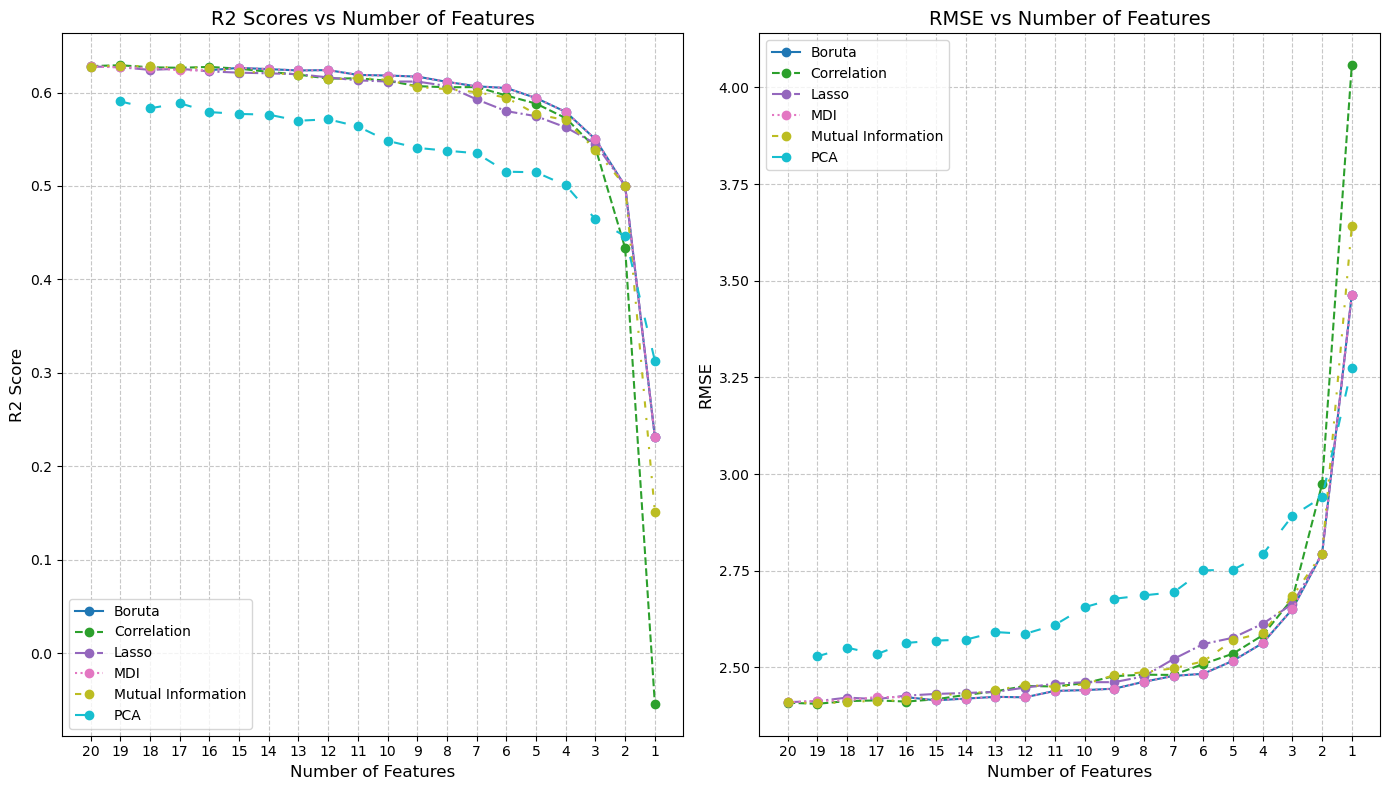

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

#Combine the dataframes for plotting
combined_df = pd.concat([df1, df2, df3, df4, df5, df6])

combined_df = combined_df.sort_values(by=["Method", "Num_Features"], ascending=[True, False])

# Define unique line styles and colors
line_styles = ["-", "--", "-.", ":", (0, (3, 5, 1, 5)), (0, (5, 10))]
colors = cm.tab10(np.linspace(0, 1, len(combined_df["Method"].unique())))

# Plot R2 and RMSE
plt.figure(figsize=(14, 8))

# Plot R2
plt.subplot(1, 2, 1)
for idx, method in enumerate(combined_df["Method"].unique()):
    subset = combined_df[combined_df["Method"] == method]
    plt.plot(subset["Num_Features"], subset["R2"], 
             marker="o", linestyle=line_styles[idx % len(line_styles)], 
             color=colors[idx], label=method)
plt.gca().invert_xaxis()  # Reverse x-axis for decreasing features
plt.title("R2 Scores vs Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(combined_df["Num_Features"].min(), combined_df["Num_Features"].max() + 1, 1))
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Plot RMSE
plt.subplot(1, 2, 2)
for idx, method in enumerate(combined_df["Method"].unique()):
    subset = combined_df[combined_df["Method"] == method]
    plt.plot(subset["Num_Features"], subset["RMSE"], 
             marker="o", linestyle=line_styles[idx % len(line_styles)], 
             color=colors[idx], label=method)
plt.gca().invert_xaxis()  # Reverse x-axis for decreasing features
plt.title("RMSE vs Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(combined_df["Num_Features"].min(), combined_df["Num_Features"].max() + 1, 1))
plt.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
